ワードクラウドを作成する例

In [ ]:
# 簡単な文章をワードクラウドのする例
with open('kenpou.txt', mode = 'r', encoding = "utf-8") as f:
  content = f.read()
print(content)

昭和二十一年憲法
日本国憲法
日本国民は、正当に選挙された国会における代表者を通じて行動し、われらとわれらの子孫のために、諸国民との協和による成果と、わが国全土にわたつて自由のもたらす恵沢を確保し、政府の行為によつて再び戦争の惨禍が起ることのないやうにすることを決意し、ここに主権が国民に存することを宣言し、この憲法を確定する。そもそも国政は、国民の厳粛な信託によるものであつて、その権威は国民に由来し、その権力は国民の代表者がこれを行使し、その福利は国民がこれを享受する。これは人類普遍の原理であり、この憲法は、かかる原理に基くものである。われらは、これに反する一切の憲法、法令及び詔勅を排除する。
日本国民は、恒久の平和を念願し、人間相互の関係を支配する崇高な理想を深く自覚するのであつて、平和を愛する諸国民の公正と信義に信頼して、われらの安全と生存を保持しようと決意した。われらは、平和を維持し、専制と隷従、圧迫と偏狭を地上から永遠に除去しようと努めてゐる国際社会において、名誉ある地位を占めたいと思ふ。われらは、全世界の国民が、ひとしく恐怖と欠乏から免かれ、平和のうちに生存する権利を有することを確認する。
われらは、いづれの国家も、自国のことのみに専念して他国を無視してはならないのであつて、政治道徳の法則は、普遍的なものであり、この法則に従ふことは、自国の主権を維持し、他国と対等関係に立たうとする各国の責務であると信ずる。
日本国民は、国家の名誉にかけ、全力をあげてこの崇高な理想と目的を達成することを誓ふ。
第一章　天皇
第一条　天皇は、日本国の象徴であり日本国民統合の象徴であつて、この地位は、主権の存する日本国民の総意に基く。
第二条　皇位は、世襲のものであつて、国会の議決した皇室典範の定めるところにより、これを継承する。
第三条　天皇の国事に関するすべての行為には、内閣の助言と承認を必要とし、内閣が、その責任を負ふ。
第四条　天皇は、この憲法の定める国事に関する行為のみを行ひ、国政に関する権能を有しない。
②　天皇は、法律の定めるところにより、その国事に関する行為を委任することができる。
第五条　皇室典範の定めるところにより摂政を置くときは、摂政は、天皇の名でその国事に関する行為を行ふ。この場合には、前条第一項の規定を準用する。
第六条　天皇は、国会の指名に基いて、内

mecabのインストールなどはテキストどおり行うこと

In [ ]:
%%bash

apt install -yq \
  mecab \
  mecab-ipadic-utf8 \
  libmecab-dev
pip install -q mecab-python3==0.996.5
ln -s /etc/mecabrc /usr/local/etc/mecabrc

Reading package lists...
Building dependency tree...
Reading state information...
libmecab-dev is already the newest version (0.996-5).
mecab is already the newest version (0.996-5).
mecab-ipadic-utf8 is already the newest version (2.7.0-20070801+main-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.




ln: failed to create symbolic link '/usr/local/etc/mecabrc': File exists


In [ ]:
pip list | grep mecab

mecab-python3                 0.996.5


In [ ]:
# フォントのインストール
!apt-get -yq install fonts-ipafont-gothic

Reading package lists...
Building dependency tree...
Reading state information...
fonts-ipafont-gothic is already the newest version (00303-18ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [ ]:
# matplotの日本語化
!pip install -q japanize-matplotlib

In [ ]:
# MeCabのインストール
import MeCab

tagger = MeCab.Tagger()

# tagger.parse(【対象の文字列】)
# 対象の文章の形態素解析を行う。（日本語を最小単位の品詞に分解する）
parsed = tagger.parse(content).split('\n')

# 形態素解析の結果である「parsed」の出力結果を確認する
# ※先頭の10行のみ表示
parsed[:10]

['昭和\t名詞,固有名詞,一般,*,*,*,昭和,ショウワ,ショーワ',
 '二\t名詞,数,*,*,*,*,二,ニ,ニ',
 '十\t名詞,数,*,*,*,*,十,ジュウ,ジュー',
 '一\t名詞,数,*,*,*,*,一,イチ,イチ',
 '年\t名詞,接尾,助数詞,*,*,*,年,ネン,ネン',
 '憲法\t名詞,一般,*,*,*,*,憲法,ケンポウ,ケンポー',
 '日本国\t名詞,固有名詞,地域,国,*,*,日本国,ニッポンコク,ニッポンコク',
 '憲法\t名詞,一般,*,*,*,*,憲法,ケンポウ,ケンポー',
 '日本\t名詞,固有名詞,地域,国,*,*,日本,ニッポン,ニッポン',
 '国民\t名詞,一般,*,*,*,*,国民,コクミン,コクミン']

In [ ]:
# 上記のデータのように形態素解析の結果は、1行の中の\t(タブ文字)の左側のみが単語データです。
# 一行の中を\tで区切って、単語データのみをWordCloudの元データとします。

import re

# parsedの中のデータを1行ずつ読み取り、「\t」か「,」でsplitする
items = (re.split('[\t,]', line) for line in parsed)

words = []
for item in items:
  if item[0] == 'EOS' or item[0] == '':
    pass
  elif item[1] in ["名詞", "形容詞", "動詞", "副詞"]:
    # 助詞、助動詞は含めない
    words.append(item[0])

# textがワードクラウド生成の対象
# 生成したwordsを文字列にしてtextに格納
text = ' '.join(words)

In [ ]:
# WordCloudを表示する準備
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import japanize_matplotlib

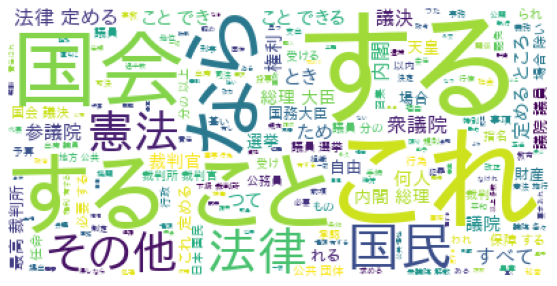

In [ ]:
# フォントをインストールしたパス（ここは変更しなくてよい）
font_path = 'usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf'

# ここでワードクラウドの元データを生成している
cloud = WordCloud(background_color='white', font_path=font_path).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(cloud)
plt.axis("off")
# ファイル名は適宜変更してください
plt.savefig('wc_noun_base_2.png')
plt.show()

In [ ]:
from PIL import Image
import numpy as np
!pip3 install wordcloud

In [ ]:
mask1 = np.array(Image.open('mask.png'))

In [ ]:
wc1 = WordCloud(background_color='white', colormap = "Accent", mask=mask1, font_path=font_path, contour_width=3, contour_color='steelblue').generate(text)

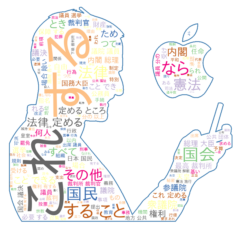

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.imshow(wc1, interpolation='bilinear')
plt.axis('off')
plt.show()
fig = plt.figure()
fig.savefig("wc.png")

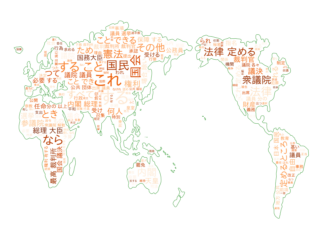

In [ ]:
mask2 = np.array(Image.open('tizu.png'))
wc2 = WordCloud(background_color='white', colormap = "Oranges_r", mask=mask2, font_path=font_path, contour_width=3, contour_color='green').generate(text)
plt.imshow(wc2, interpolation='bilinear')
plt.axis('off')
plt.show()

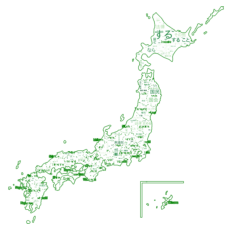

In [ ]:
mask3 = np.array(Image.open('nihon.png'))
wc3 = WordCloud(background_color='white', colormap = "Greens", mask=mask3, font_path=font_path, contour_width=3, contour_color='Green').generate(text)
plt.imshow(wc3, interpolation='bilinear')
plt.axis('off')
plt.show()

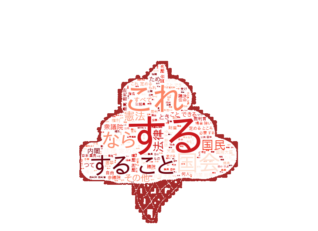

In [ ]:
mask4 = np.array(Image.open('soft.png'))
wc4 = WordCloud(background_color='white', colormap = "Reds", mask=mask4, font_path=font_path, contour_width=3, contour_color='brown').generate(text)
plt.imshow(wc4, interpolation='bilinear')
plt.axis('off')
plt.show()